In [1]:
import pandas as pd
import numpy as np


In [67]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['font.size'] = 10 # 글자 크기
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [68]:
pd.set_option('display.max_columns',50)

In [69]:
df = pd.read_csv('data/학생건강검사 결과분석 rawdata_서울_2015.csv')

df.head(5)

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,남,20150511,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,남,20150415,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,남,20150520,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,남,20150421,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,남,20150423,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_a = df.copy()


In [71]:
df_a.dropna(axis=1, inplace=True)

df_a

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,남,20150511,172.1,60.5
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,남,20150415,139.7,44.5
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,남,20150520,179.0,78.9
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,남,20150421,137.0,29.2
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,남,20150423,154.9,53.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,Aa176여60123,86.530238,Aa17,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,경기초등학교,남여공학,6,1,여,20150423,150.8,37.4
9678,Ac073여30109,82.873000,Ac07,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,성심여자고등학교,여자,3,1,여,20150413,156.7,79.3
9679,Aa045여50122,135.488328,Aa04,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울길원초등학교,남여공학,5,1,여,20150407,148.5,40.2
9680,Aa174여40128,86.554674,Aa17,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,경기초등학교,남여공학,4,1,여,20150508,138.4,41.4


In [72]:
df_a['학교급별'] = [v-1 for v in df_a['학교급별']]

In [73]:
df_a['시도별'].unique()

array(['서울특별시교육청'], dtype=object)

In [74]:
df_a['도시규모'].unique()

array(['대도시/중소도시'], dtype=object)

In [75]:
df_a['학년도'].unique()

array([2015], dtype=int64)

In [76]:
df_a['공학여부'].unique()

array(['남여공학', '여자', '남자'], dtype=object)

In [77]:
v, k = pd.factorize(df_a['공학여부'])
print(v, k)

[0 0 0 ... 0 0 0] Index(['남여공학', '여자', '남자'], dtype='object')


In [78]:
v2, k2 = pd.factorize(df_a['성별'])
print(v2, k2)

[0 0 0 ... 1 1 0] Index(['남', '여'], dtype='object')


In [79]:
df_a['공학여부'] = v
df_a['성별'] = v2

In [80]:
df_a.describe()

,최종가중치,학년도,학교급별,공학여부,학년,반,성별,건강검진일,키,몸무게
count,9682.000000,9682.0,9682.000000,9682.000000,9682.000000,9682.000000,9682.000000,9.682000e+03,9682.000000,9682.000000
mean,104.874520,2015.0,0.996178,0.340839,2.566515,2.659368,0.487296,2.015047e+07,154.564832,50.207591
std,39.372863,0.0,0.856437,0.674259,1.412813,2.601570,0.499864,1.014966e+02,16.971475,17.075953
min,23.325794,2015.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.015023e+07,107.700000,15.900000
25%,76.966829,2015.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.015041e+07,142.000000,37.200000
50%,99.635381,2015.0,1.000000,0.000000,2.000000,1.000000,0.000000,2.015043e+07,158.700000,50.700000
75%,133.231158,2015.0,2.000000,0.000000,3.000000,3.000000,1.000000,2.015051e+07,167.200000,60.600000
max,248.300844,2015.0,2.000000,2.000000,6.000000,15.000000,1.000000,2.015091e+07,194.200000,130.700000


In [81]:
import seaborn as sns

<AxesSubplot:>

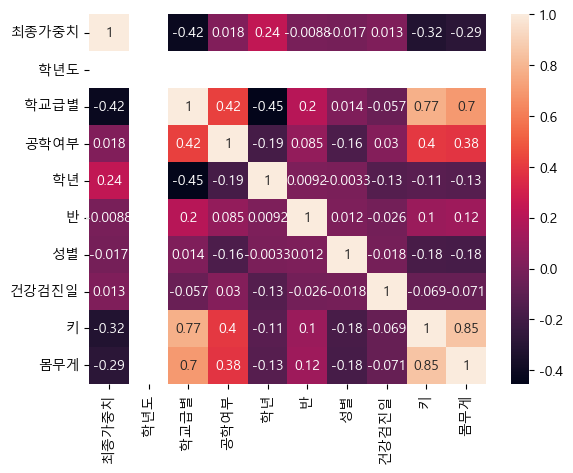

In [82]:
sns.heatmap(df_a.corr(),annot=True)

In [83]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings


In [84]:
valid_cols = ['공학여부', '학년', '키', '몸무게', '학교급별']

anal_df = df_a[valid_cols]

anal_df


,공학여부,학년,키,몸무게,학교급별
0,0,3,172.1,60.5,2
1,0,3,139.7,44.5,0
2,0,3,179.0,78.9,2
3,0,4,137.0,29.2,0
4,0,2,154.9,53.5,1
...,...,...,...,...,...
9677,0,6,150.8,37.4,0
9678,1,3,156.7,79.3,2
9679,0,5,148.5,40.2,0
9680,0,4,138.4,41.4,0


In [85]:

# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'label'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col].astype('int') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)

    scaler.fit(X_train)

    scaled_x_train = scaler.transform(X_train)
    scaled_x_test = scaler.transform(X_test)

    train_test_dict['test_x'] = scaled_x_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = scaled_x_train
    train_test_dict['train_y'] = y_train

    return train_test_dict

train_test_dict = data_split(input_df=anal_df, y_col='학교급별')

In [86]:
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

from tensorflow.keras import backend as K

from tensorflow.keras.utils import to_categorical

In [87]:
def DNN(Nin, Numclass, lr= 0.01):
    try:
        model = Sequential()
        
        model.add(layers.Input(shape=(Nin)))
        model.add(layers.Dense(16))
        model.add(layers.Activation('relu'))

        model.add(layers.Dense(32))
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(0.1))

        model.add(layers.Dense(8))
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(0.1))

        model.add(layers.Dense(Numclass))
        model.add(layers.Activation('softmax'))


        optimizer = Adam(lr)

        model.compile(loss='categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])

        model.summary()
        return model

    except Exception as e:
        print(e)

In [88]:
def learning_model(model, X_train, y_train):

    rlr_call = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)
    es = EarlyStopping(monitor="val_loss",
                    patience=10,
                        verbose=1,
                        mode="min",
                        restore_best_weights=True,)

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2, callbacks=[rlr_call, es])

    return history

In [89]:
model = DNN(Nin=train_test_dict['train_x'].shape[1], Numclass=3, lr=0.001)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_24 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_25 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 264       
_________________________________________________________________
activation_26 (Activation)   (None, 8)                

In [90]:

history= learning_model(model=model, X_train=train_test_dict['train_x'], y_train=to_categorical(train_test_dict['train_y']))

Train on 6196 samples, validate on 1549 samples
Epoch 1/100
6196/6196 - 0s - loss: 0.9289 - acc: 0.6356 - val_loss: 0.7205 - val_acc: 0.7444
Epoch 2/100
6196/6196 - 0s - loss: 0.6369 - acc: 0.7055 - val_loss: 0.4944 - val_acc: 0.7521
Epoch 3/100
6196/6196 - 0s - loss: 0.5206 - acc: 0.7260 - val_loss: 0.4272 - val_acc: 0.7811
Epoch 4/100
6196/6196 - 0s - loss: 0.4691 - acc: 0.7469 - val_loss: 0.4018 - val_acc: 0.7883
Epoch 5/100
6196/6196 - 0s - loss: 0.4455 - acc: 0.7513 - val_loss: 0.3944 - val_acc: 0.7999
Epoch 6/100
6196/6196 - 0s - loss: 0.4380 - acc: 0.7495 - val_loss: 0.3950 - val_acc: 0.8076
Epoch 7/100
6196/6196 - 0s - loss: 0.4297 - acc: 0.7586 - val_loss: 0.3882 - val_acc: 0.8037
Epoch 8/100
6196/6196 - 0s - loss: 0.4257 - acc: 0.7592 - val_loss: 0.3861 - val_acc: 0.8076
Epoch 9/100
6196/6196 - 0s - loss: 0.4206 - acc: 0.7623 - val_loss: 0.3821 - val_acc: 0.8063
Epoch 10/100
6196/6196 - 0s - loss: 0.4189 - acc: 0.7660 - val_loss: 0.3798 - val_acc: 0.8057
Epoch 11/100
6196/619

In [91]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

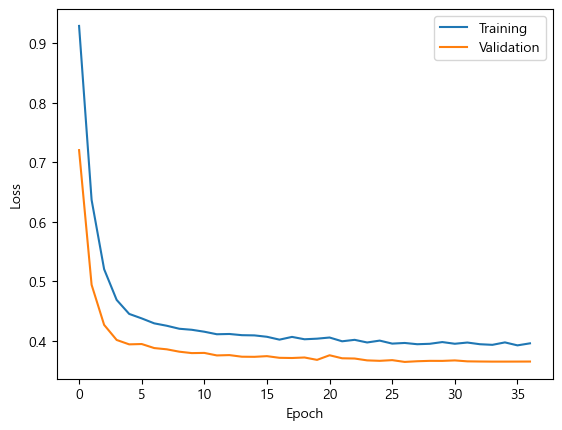

Test set accuracy:  0.7981414558595766
[[720   0   0]
 [  1 233 261]
 [  0 129 593]]


In [94]:
plot_loss(history=history)
plt.show()
predictions = model.predict(train_test_dict['test_x'])
pred_classes = np.argmax(predictions, axis=-1)
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], pred_classes))
print(confusion_matrix(train_test_dict['test_y'], pred_classes, labels=list(range(3))))